In [84]:
#Gerekli kütüphaneleri import et
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from warnings import filterwarnings
filterwarnings('ignore')

In [85]:
#Veriyi csv formatında import et

data = r"C:\Users\fatih\OneDrive\Desktop\car_price_prediction.csv"

In [86]:
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [87]:
# Veri setinin ilk 5 satırını görüntüle.
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [88]:
# Veri setinin son 5 satırını görüntüle.
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923,4.0,Automatic,Front,04-May,Left wheel,White,12


In [89]:
# Veri setindeki toplam satır sayısını hesapla ve görüntüle.
toplam_satir = len(df)
print("Toplam satır sayısı:", toplam_satir)


Toplam satır sayısı: 19237


In [90]:
# Veri setindeki sütun adlarını ve veri tiplerini görüntüle.
print(df.columns)

print("\n")

print(df.dtypes)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


In [91]:
# Veri setindeki sayısal sütunlar için temel istatistiksel bilgileri görüntüle (count, mean, std, min, 25%, 50%, 75%, max).df = pd.read_csv(r"C:\Users\fatih\OneDrive\Desktop\car_price_prediction.csv")
df.describe(include= 'number').T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,9.365914e+05,20746880.0,45698374.0,45772308.0,45802036.0,4.581665e+07
Price,19237.0,1.855593e+04,1.905813e+05,1.0,5331.0,13172.0,22075.0,2.630750e+07
Prod. year,19237.0,2.010913e+03,5.668673e+00,1939.0,2009.0,2012.0,2015.0,2.020000e+03
Mileage,19237.0,1.532236e+06,4.840387e+07,0.0,70139.0,126000.0,188888.0,2.147484e+09
Cylinders,19237.0,4.582991e+00,1.199933e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,19237.0,6.582627e+00,4.320168e+00,0.0,4.0,6.0,12.0,1.600000e+01


In [92]:
df.rename(columns = {"ID": "Numara",
                     "Price": "Fiyat",
                     "Levy": "Vergi",
                     "Manufacturer": "Üretici",
                     "Model": "Model",
                     "Prod. year": "Üretim Yılı",
                     "Category": "Kategori",
                     "Leather interior": "Deri iç kısım",
                     "Fuel type": "Yakıt Tipi",
                     "Engine volume": "Motor Hacmi",
                     "Mileage": "Kilometre",
                     "Cylinders": "Silindirler",
                     "Gear box type": "vites_kutusu",
                     "Drive wheels": "Çekiş Gücü",
                     "Doors": "Kapılar",
                     "Wheel": "Teker",
                     "Color": "Renk",
                     "Airbags": "Hava Yastıkları"} , inplace = True)
                     


                    

In [93]:
df.head()

,Numara,Fiyat,Vergi,Üretici,Model,Üretim Yılı,Kategori,Deri iç kısım,Yakıt Tipi,Motor Hacmi,Kilometre,Silindirler,vites_kutusu,Çekiş Gücü,Kapılar,Teker,Renk,Hava Yastıkları
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [94]:
df.vites_kutusu.unique()

array(['Automatic', 'Tiptronic', 'Variator', 'Manual'], dtype=object)

In [95]:
df["vites_kutusu"] = df.vites_kutusu.map({"Automatic":"Otomatik", "Tiptronic":"Manual ve Otomatik", "Variator": "Yarı Otomatik", "Manual": "Manuel"})

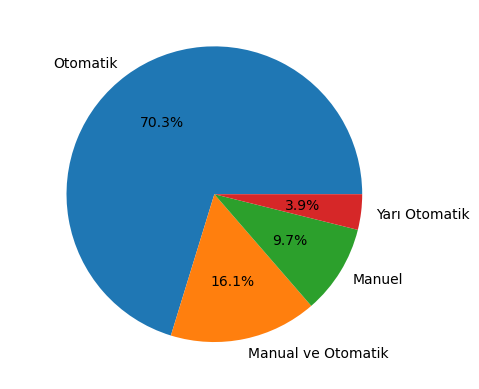

In [96]:
df.vites_kutusu.value_counts().plot(kind= "pie", autopct = "%.1f%%")
plt.ylabel(" ");

In [97]:
# Her hücredeki değerin boş olup olmadığını kontrol etmek için bir boolean DataFrame oluştur ve boş değerlerin toplam sayısını hesapla.
print(df.isnull)

print("\n")

print(df.isnull().sum())

<bound method DataFrame.isnull of          Numara  Fiyat Vergi        Üretici    Model  Üretim Yılı   Kategori  \
0      45654403  13328  1399          LEXUS   RX 450         2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox         2011       Jeep   
2      45774419   8467     -          HONDA      FIT         2006  Hatchback   
3      45769185   3607   862           FORD   Escape         2011       Jeep   
4      45809263  11726   446          HONDA      FIT         2014  Hatchback   
...         ...    ...   ...            ...      ...          ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200         1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata         2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson         2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva         2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata         2012      Sedan   

     

In [98]:
# Her sütundaki eksik değerlerin (NaN) toplam sayısını hesapla.
print(df.isna().sum())

Numara             0
Fiyat              0
Vergi              0
Üretici            0
Model              0
Üretim Yılı        0
Kategori           0
Deri iç kısım      0
Yakıt Tipi         0
Motor Hacmi        0
Kilometre          0
Silindirler        0
vites_kutusu       0
Çekiş Gücü         0
Kapılar            0
Teker              0
Renk               0
Hava Yastıkları    0
dtype: int64


In [120]:
# "-" olan değerleri NaN ile değiştir
df['Vergi'].replace('-', pd.NA, inplace=True)

# NaN olan değerleri ortalama ile doldur
df['Vergi'].fillna(df['Vergi'].dropna().astype(float).mean(), inplace=True)

print(df['Vergi'])

0              1399
1              1018
2        906.838128
3               862
4               446
            ...    
19232    906.838128
19233           831
19234           836
19235          1288
19236           753
Name: Vergi, Length: 19237, dtype: object


In [145]:
# Kategorik değişkenleri dönüştür
label_encoder = LabelEncoder()
df["Üretici"] = label_encoder.fit_transform(df["Üretici"])
print(df["Üretici"])

0        32
1         8
2        21
3        16
4        21
         ..
19232    36
19233    23
19234    23
19235     8
19236    23
Name: Üretici, Length: 19237, dtype: int64


In [146]:
label_encoder = LabelEncoder()
df["Model"] = label_encoder.fit_transform(df["Model"])
print(df["Model"])

0        1242
1         658
2         684
3         661
4         684
         ... 
19232     385
19233    1334
19234    1442
19235     456
19236    1334
Name: Model, Length: 19237, dtype: int32


In [147]:
label_encoder = LabelEncoder()
df["Kategori"] = label_encoder.fit_transform(df["Kategori"])
print(df["Kategori"])

0        4
1        4
2        3
3        4
4        3
        ..
19232    1
19233    9
19234    4
19235    4
19236    9
Name: Kategori, Length: 19237, dtype: int32


In [148]:
label_encoder = LabelEncoder()
df["Deri iç kısım"] = label_encoder.fit_transform(df["Deri iç kısım"])
print(df["Deri iç kısım"])

0        1
1        0
2        0
3        1
4        1
        ..
19232    1
19233    1
19234    1
19235    1
19236    1
Name: Deri iç kısım, Length: 19237, dtype: int32


In [150]:
label_encoder = LabelEncoder()
df["Yakıt Tipi"] = label_encoder.fit_transform(df["Yakıt Tipi"])
print(df["Yakıt Tipi"])

0        2
1        5
2        5
3        2
4        5
        ..
19232    0
19233    5
19234    1
19235    1
19236    2
Name: Yakıt Tipi, Length: 19237, dtype: int32


In [151]:
label_encoder = LabelEncoder()
df["Motor Hacmi"] = label_encoder.fit_transform(df["Motor Hacmi"])
print(df["Motor Hacmi"])

0        36
1        31
2        13
3        25
4        13
         ..
19232    65
19233    24
19234    20
19235    20
19236    24
Name: Motor Hacmi, Length: 19237, dtype: int32


In [152]:
label_encoder = LabelEncoder()
df["vites_kutusu"] = label_encoder.fit_transform(df["vites_kutusu"])
print(df["vites_kutusu"])

0        2
1        0
2        3
3        2
4        2
        ..
19232    1
19233    0
19234    2
19235    2
19236    2
Name: vites_kutusu, Length: 19237, dtype: int32


In [153]:
label_encoder = LabelEncoder()
df["Çekiş Gücü"] = label_encoder.fit_transform(df["Çekiş Gücü"])
print(df["Çekiş Gücü"])

0        0
1        0
2        1
3        0
4        1
        ..
19232    2
19233    1
19234    1
19235    1
19236    1
Name: Çekiş Gücü, Length: 19237, dtype: int32


In [154]:
label_encoder = LabelEncoder()
df["Kapılar"] = label_encoder.fit_transform(df["Kapılar"])
print(df["Kapılar"])

0        1
1        1
2        1
3        1
4        1
        ..
19232    0
19233    1
19234    1
19235    1
19236    1
Name: Kapılar, Length: 19237, dtype: int32


In [155]:
label_encoder = LabelEncoder()
df["Teker"] = label_encoder.fit_transform(df["Teker"])
print(df["Teker"])

0        0
1        0
2        1
3        0
4        0
        ..
19232    0
19233    0
19234    0
19235    0
19236    0
Name: Teker, Length: 19237, dtype: int32


In [156]:
label_encoder = LabelEncoder()
df["Renk"] = label_encoder.fit_transform(df["Renk"])
print(df["Renk"])

0        12
1         1
2         1
3        14
4        12
         ..
19232    12
19233    11
19234     7
19235     1
19236    14
Name: Renk, Length: 19237, dtype: int32


In [158]:
df.info()
df['Vergi'] = df['Vergi'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Numara           19237 non-null  int64  
 1   Fiyat            19237 non-null  int64  
 2   Vergi            19237 non-null  object 
 3   Üretici          19237 non-null  int64  
 4   Model            19237 non-null  int32  
 5   Üretim Yılı      19237 non-null  int64  
 6   Kategori         19237 non-null  int32  
 7   Deri iç kısım    19237 non-null  int32  
 8   Yakıt Tipi       19237 non-null  int32  
 9   Motor Hacmi      19237 non-null  int32  
 10  Kilometre        19237 non-null  int64  
 11  Silindirler      19237 non-null  float64
 12  vites_kutusu     19237 non-null  int32  
 13  Çekiş Gücü       19237 non-null  int32  
 14  Kapılar          19237 non-null  int32  
 15  Teker            19237 non-null  int32  
 16  Renk             19237 non-null  int32  
 17  Hava Yastıkl

In [159]:
features = ["Vergi", "Üretici",	"Model", "Üretim Yılı",	"Kategori",	"Deri iç kısım", "Yakıt Tipi", "Motor Hacmi", "Kilometre", "Silindirler", "vites_kutusu", "Çekiş Gücü",	"Kapılar", "Teker", "Renk",	"Hava Yastıkları"]

X = df[features]

print("X Deişkenleri:","\n", X)

print("\n")

y = df["Fiyat"]

print("Y Hedef Değişkeni:", "\n", y)

print("\n")

X Deişkenleri: 
              Vergi  Üretici  Model  Üretim Yılı  Kategori  Deri iç kısım  \
0      1399.000000       32   1242         2010         4              1   
1      1018.000000        8    658         2011         4              0   
2       906.838128       21    684         2006         3              0   
3       862.000000       16    661         2011         4              1   
4       446.000000       21    684         2014         3              1   
...            ...      ...    ...          ...       ...            ...   
19232   906.838128       36    385         1999         1              1   
19233   831.000000       23   1334         2011         9              1   
19234   836.000000       23   1442         2010         4              1   
19235  1288.000000        8    456         2007         4              1   
19236   753.000000       23   1334         2012         9              1   

       Yakıt Tipi  Motor Hacmi  Kilometre  Silindirler  vites_kutusu  

In [162]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Doğrusal regresyon modelini oluştur
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [164]:
df.head()

,Numara,Fiyat,Vergi,Üretici,Model,Üretim Yılı,Kategori,Deri iç kısım,Yakıt Tipi,Motor Hacmi,Kilometre,Silindirler,vites_kutusu,Çekiş Gücü,Kapılar,Teker,Renk,Hava Yastıkları,Yakıt Tipi
0,45654403,13328,1399.000000,32,1242,2010,4,1,2,36,186005,6.0,2,0,1,0,12,12,2
1,44731507,16621,1018.000000,8,658,2011,4,0,5,31,192000,6.0,0,0,1,0,1,8,5
2,45774419,8467,906.838128,21,684,2006,3,0,5,13,200000,4.0,3,1,1,1,1,2,5
3,45769185,3607,862.000000,16,661,2011,4,1,2,25,168966,4.0,2,0,1,0,14,0,2
4,45809263,11726,446.000000,21,684,2014,3,1,5,13,91901,4.0,2,1,1,0,12,4,5
